### Practica 4

###Importación de Drive para usar en Google Colaboratory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importación de carpeta de Drive

In [ ]:
import os
os.chdir("/content/drive/MyDrive/SI")

### Cargamos el dataset e importamos pandas y numpy

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

df = pd.read_csv('dataset-actualizado.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
744,16685,Female,71.0,1,0,Yes,Private,Urban,194.62,31.6,never smoked,0
745,44583,Female,56.0,0,1,Yes,Private,Rural,70.02,32.3,never smoked,0
746,25315,Male,31.0,0,0,Yes,Private,Urban,222.21,41.1,smokes,0
747,58227,Female,64.0,0,0,Yes,Govt_job,Rural,62.41,30.0,never smoked,0


### Limpiamos el dataset

Vamos a eliminar la columna de id ya que no nos interesa, además la columna bmi contiene valores nulos calificados como N/A en el dataset por lo que eliminamos las filas con esos valores

In [2]:
df_clean = df
df_clean = df_clean.drop(['id'],axis=1)
df_clean = df_clean.dropna()


El dataset contiene columnas no numericas, para trabajar de forma mas secilla con el dataset vamos a codificar esas columnas con valores numericos

In [3]:
df_clean['gender'] = pd.factorize(df_clean['gender'])[0]
df_clean['ever_married'] = pd.factorize(df_clean['ever_married'])[0]
df_clean['work_type'] = pd.factorize(df_clean['work_type'])[0]
df_clean['Residence_type'] = pd.factorize(df_clean['Residence_type'])[0]
df_clean['smoking_status'] = pd.factorize(df_clean['smoking_status'])[0]

df_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
744,1,71.0,1,0,0,0,0,194.62,31.6,1,0
745,1,56.0,0,1,0,0,1,70.02,32.3,1,0
746,0,31.0,0,0,0,0,0,222.21,41.1,2,0
747,1,64.0,0,0,0,2,1,62.41,30.0,1,0


### Normalizamos los datos usando normalize de sklearn

In [4]:
from sklearn.preprocessing import normalize

# Crear un DataFrame de Pandas
df = pd.DataFrame(df_clean)

# Seleccionar solo las columnas numéricas para normalizar
columnas_numericas = ['age', 'avg_glucose_level', 'bmi']

# Normalizar las columnas seleccionadas
df[columnas_numericas] = normalize(df[columnas_numericas])

print(df)



     gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0  0.277897             0              1             0          0   
2         0  0.585405             0              1             0          0   
3         1  0.270129             0              0             0          0   
4         1  0.409955             1              0             0          1   
5         0  0.394882             0              0             0          0   
..      ...       ...           ...            ...           ...        ...   
744       1  0.338801             1              0             0          0   
745       1  0.587618             0              1             0          0   
746       0  0.135908             0              0             0          0   
747       1  0.678742             0              0             0          2   
748       0  0.597355             0              0             0          1   

     Residence_type  avg_glucose_level       bmi  s

# Arbol de decisión

Experimentación para obtener los mejores parámetros para nuestro problema, en nuestro caso al tener desbalanceo de clases vamos a usar la métrica de exhaustividad porque estamos interesados en detectar los casos positivos correctamente

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Puntuación media de validación cruzada del mejor modelo: 0.5375


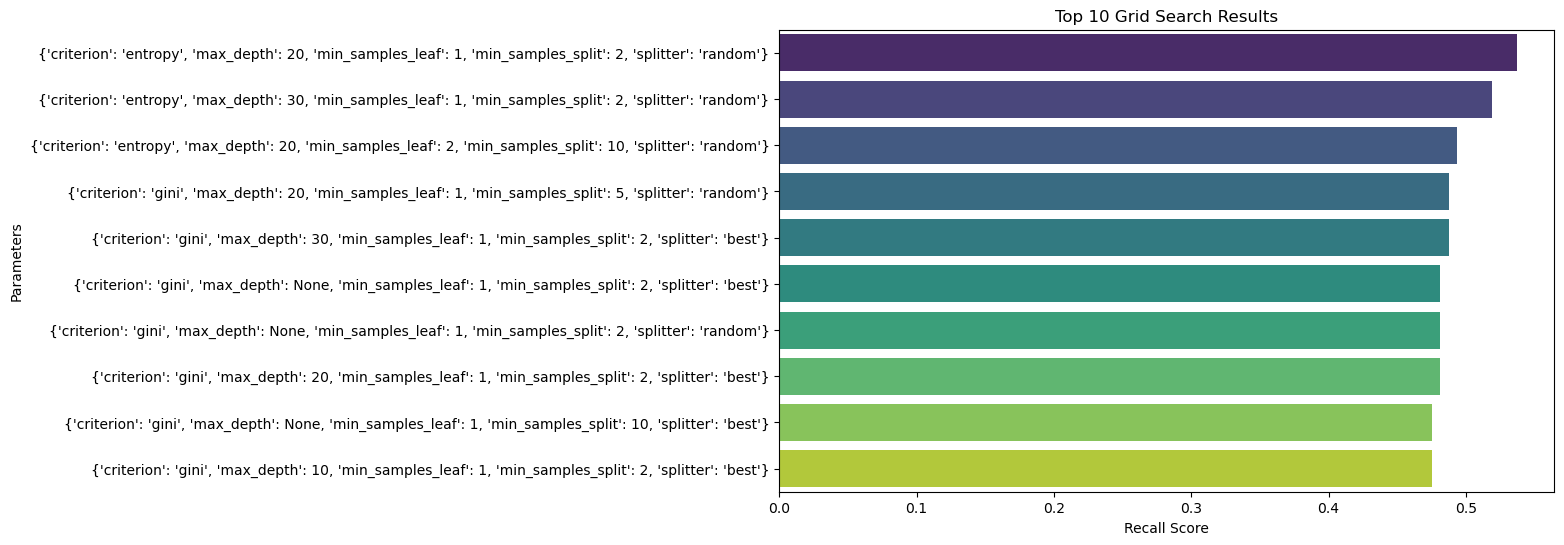

Precisión del modelo de árbol de decisión: 0.6785714285714286
Exhaustividad del modelo de árbol de decisión: 0.5102040816326531
F1-score del modelo de árbol de decisión: 0.5263157894736842
Matriz de confusión del modelo de árbol de decisión:
                 Predicho Negativo  Predicho Positivo
Actual Negativo                 70                 21
Actual Positivo                 24                 25
Especificidad del modelo de árbol de decisión: 0.7692307692307693
G-Mean del modelo de árbol de decisión: 0.6264700137907352
Índice de Matthews del modelo de árbol de decisión: 0.28376345513128437
Área bajo la curva ROC del modelo de árbol de decisión: 0.6397174254317111


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=['stroke'])  # Características
y = df['stroke']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el clasificador del árbol de decisión
clf = DecisionTreeClassifier()

# Inicializar la búsqueda en la cuadrícula con validación cruzada, usamos recall como métrica de puntuación
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='recall')

# Entrenar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda en la cuadrícula
best_clf = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener la puntuación media de validación cruzada del mejor modelo
print("Puntuación media de validación cruzada del mejor modelo:", grid_search.best_score_)

# Obtener detalles sobre cada combinación de parámetros probada
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv')  # Guardar los resultados en un archivo CSV para análisis adicional

# Obtener detalles sobre las primeras N combinaciones de parámetros probadas
top_n = 10  # Define el número de combinaciones de parámetros principales que deseas mostrar
top_results = results_df.nlargest(top_n, 'mean_test_score')

# Convertir los parámetros a una cadena legible
params_str = [str(params) for params in top_results['params']]

# Visualizar los resultados utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_results['mean_test_score'], y=params_str, orient='h', palette='viridis')
plt.xlabel('Recall Score')
plt.ylabel('Parameters')
plt.title('Top {} Grid Search Results'.format(top_n))
plt.show()

# Predecir sobre el conjunto de prueba con el mejor modelo
y_pred = best_clf.predict(X_test)

# Calcular y mostrar métricas de evaluación
accuracy_dt = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy_dt)

recall_dt = recall_score(y_test, y_pred)
print("Exhaustividad del modelo de árbol de decisión:", recall_dt)

f1_dt = f1_score(y_test, y_pred)
print("F1-score del modelo de árbol de decisión:", f1_dt)

conf_matrix = confusion_matrix(y_test, y_pred)
confusion_dt = pd.DataFrame(conf_matrix, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])
print("Matriz de confusión del modelo de árbol de decisión:")
print(confusion_dt)

tn, fp, fn, tp = conf_matrix.ravel()
specificity_dt = tn / (tn + fp)
print("Especificidad del modelo de árbol de decisión:", specificity_dt)

g_mean_dt = (recall_dt * specificity_dt) ** 0.5
print("G-Mean del modelo de árbol de decisión:", g_mean_dt)

mcc_dt = matthews_corrcoef(y_test, y_pred)
print("Índice de Matthews del modelo de árbol de decisión:", mcc_dt)

y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba)
print("Área bajo la curva ROC del modelo de árbol de decisión:", roc_auc_dt)


### Exportamos el arbol de decisión

In [ ]:
#conda install python-graphviz

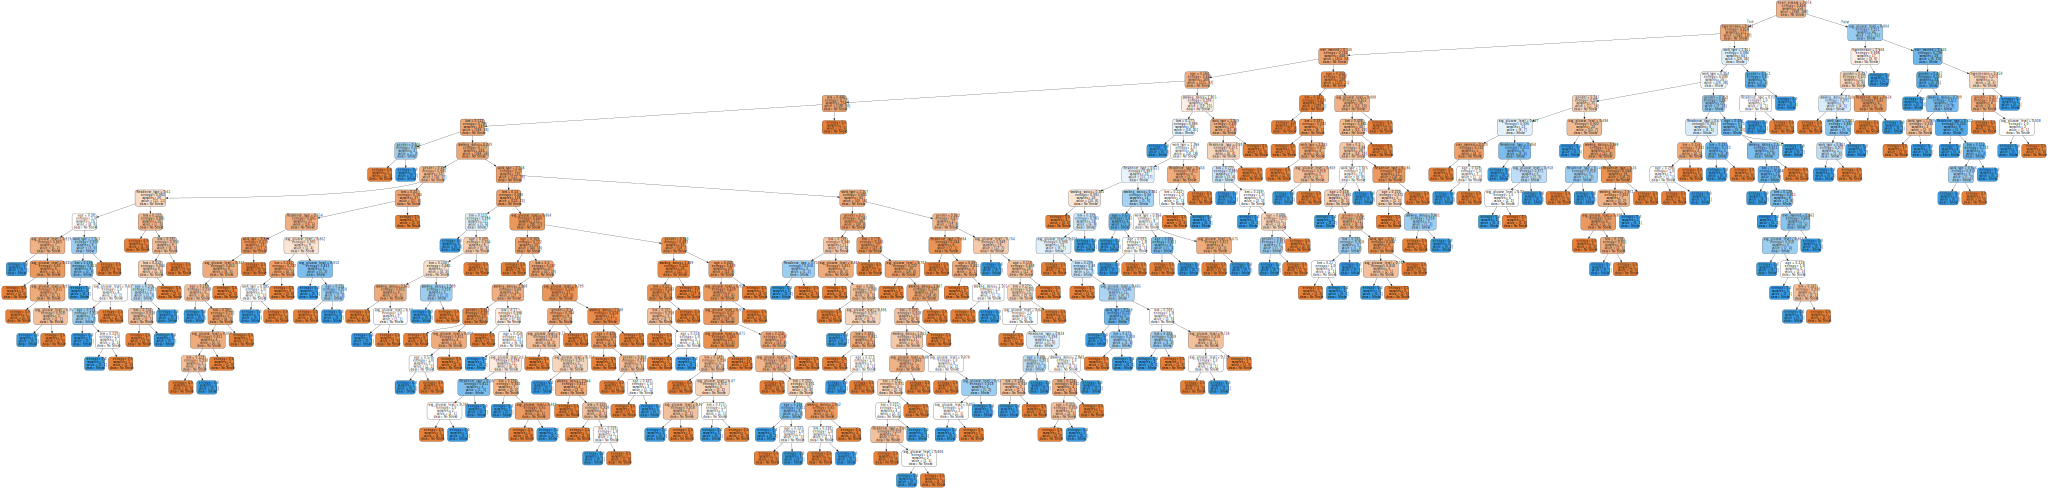

In [6]:
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol de decisión a un archivo .dot
dot_data = export_graphviz(best_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Stroke', 'Stroke'],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el objeto Graphviz
graph = graphviz.Source(dot_data)

# Guardar el árbol de decisión en un archivo .png o visualizarlo en el Notebook
graph.render("stroke_decision_tree", format='png', cleanup=True)
# Visualizar el árbol de decisión en el Notebook
graph


### KNN

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Puntuación media de validación cruzada del mejor modelo: 0.39375


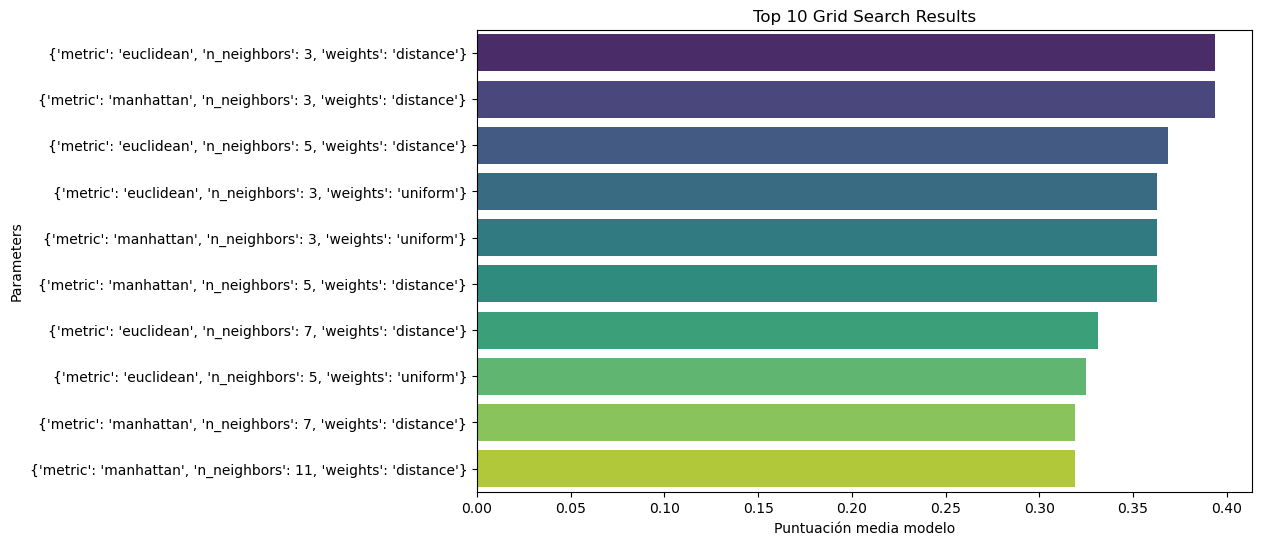

Precisión del modelo KNN: 0.6857142857142857
Exhaustividad del modelo KNN: 0.3469387755102041
F1-score del modelo KNN: 0.43589743589743585
Matriz de confusión del modelo KNN:
                 Predicho Negativo  Predicho Positivo
Actual Negativo                 79                 12
Actual Positivo                 32                 17
Especificidad del modelo KNN: 0.8681318681318682
G-Mean del modelo KNN: 0.5488065299457143
Índice de Matthews del modelo KNN: 0.2531275307669388
Área bajo la curva ROC del modelo KNN: 0.6751513792330119


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=['stroke'])  # Características
y = df['stroke']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de valores de los hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan']  # Métrica de distancia
}

# Inicializar el clasificador KNN
knn = KNeighborsClassifier()

# Inicializar la búsqueda en la cuadrícula con validación cruzada, utilizando recall como métrica de puntuación
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

# Entrenar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda en la cuadrícula
best_knn = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener la puntuación media de validación cruzada del mejor modelo
print("Puntuación media de validación cruzada del mejor modelo:", grid_search.best_score_)

# Obtener detalles sobre cada combinación de parámetros probada
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv')  # Guardar los resultados en un archivo CSV para análisis adicional

# Obtener detalles sobre las primeras N combinaciones de parámetros probadas
top_n = 10  # Define el número de combinaciones de parámetros principales que deseas mostrar
top_results = results_df.nlargest(top_n, 'mean_test_score')

# Convertir los parámetros a una cadena legible
params_str = [str(params) for params in top_results['params']]

# Visualizar los resultados utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_results['mean_test_score'], y=params_str, orient='h', palette='viridis')
plt.xlabel('Puntuación media modelo')
plt.ylabel('Parameters')
plt.title('Top {} Grid Search Results'.format(top_n))
plt.show()


# Predecir sobre el conjunto de prueba con el mejor modelo
y_pred = best_knn.predict(X_test)

# Calcular y mostrar métricas de evaluación
accuracy_knn = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN:", accuracy_knn)

recall_knn = recall_score(y_test, y_pred)
print("Exhaustividad del modelo KNN:", recall_knn)

f1_knn = f1_score(y_test, y_pred)
print("F1-score del modelo KNN:", f1_knn)

conf_matrix = confusion_matrix(y_test, y_pred)
confusion_knn = pd.DataFrame(conf_matrix, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])
print("Matriz de confusión del modelo KNN:")
print(confusion_knn)

tn, fp, fn, tp = conf_matrix.ravel()
specificity_knn = tn / (tn + fp)
print("Especificidad del modelo KNN:", specificity_knn)

g_mean_knn = (recall_knn * specificity_knn) ** 0.5
print("G-Mean del modelo KNN:", g_mean_knn)

mcc_knn = matthews_corrcoef(y_test, y_pred)
print("Índice de Matthews del modelo KNN:", mcc_knn)

y_pred_proba = best_knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_proba)
print("Área bajo la curva ROC del modelo KNN:", roc_auc_knn)


### Support Vector Machines


Mejores parámetros: {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Puntuación media de validación cruzada del mejor modelo: 0.325


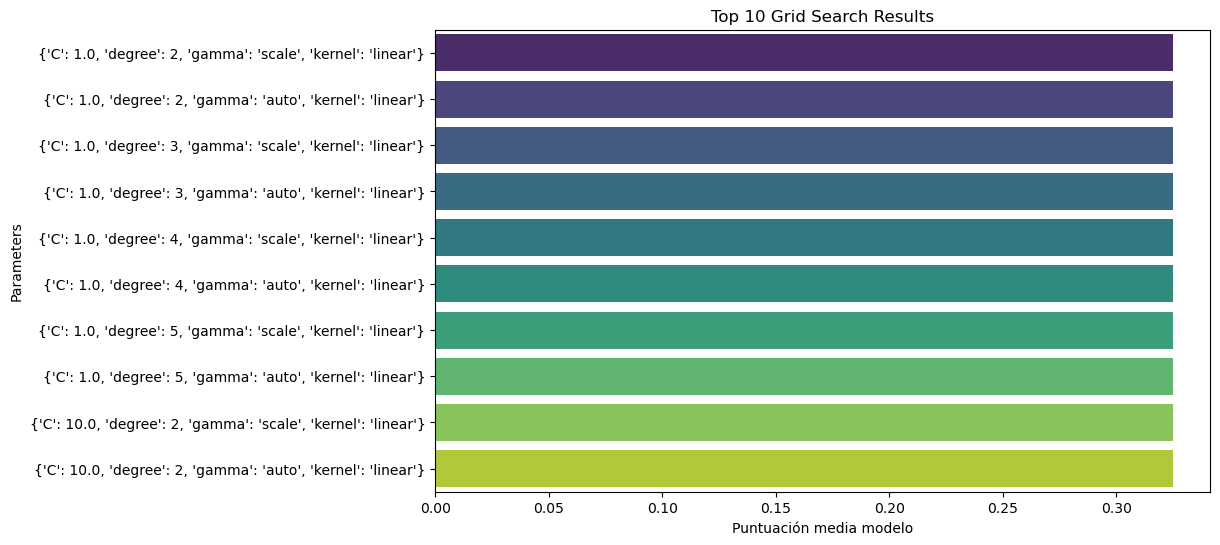

Precisión del modelo SVM: 0.7214285714285714
Exhaustividad del modelo SVM: 0.46938775510204084
F1-score del modelo SVM: 0.5411764705882353
Matriz de confusión del modelo SVM:
                 Predicho Negativo  Predicho Positivo
Actual Negativo                 78                 13
Actual Positivo                 26                 23
Especificidad del modelo SVM: 0.8571428571428571
G-Mean del modelo SVM: 0.6342967456293899
Índice de Matthews del modelo SVM: 0.3563483225498992
Área bajo la curva ROC del modelo SVM: 0.814756671899529


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=['stroke'])  # Características
y = df['stroke']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de valores de los hiperparámetros a probar
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

# Inicializar el clasificador SVM
svm = SVC()

# Inicializar la búsqueda en la cuadrícula con validación cruzada, utilizando recall como métrica de puntuación
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='recall')

# Entrenar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda en la cuadrícula
best_svm = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener la puntuación media de validación cruzada del mejor modelo
print("Puntuación media de validación cruzada del mejor modelo:", grid_search.best_score_)

# Obtener detalles sobre cada combinación de parámetros probada
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv')  # Guardar los resultados en un archivo CSV para análisis adicional

# Obtener detalles sobre las primeras N combinaciones de parámetros probadas
top_n = 10  # Define el número de combinaciones de parámetros principales que deseas mostrar
top_results = results_df.nlargest(top_n, 'mean_test_score')

# Convertir los parámetros a una cadena legible
params_str = [str(params) for params in top_results['params']]

# Visualizar los resultados utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_results['mean_test_score'], y=params_str, orient='h', palette='viridis')
plt.xlabel('Puntuación media modelo')
plt.ylabel('Parameters')
plt.title('Top {} Grid Search Results'.format(top_n))
plt.show()


# Predecir sobre el conjunto de prueba con el mejor modelo
y_pred = best_svm.predict(X_test)

# Calcular y mostrar métricas de evaluación
accuracy_svm = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy_svm)

recall_svm = recall_score(y_test, y_pred)
print("Exhaustividad del modelo SVM:", recall_svm)

f1_svm = f1_score(y_test, y_pred)
print("F1-score del modelo SVM:", f1_svm)

conf_matrix = confusion_matrix(y_test, y_pred)
confusion_svm = pd.DataFrame(conf_matrix, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])
print("Matriz de confusión del modelo SVM:")
print(confusion_svm)

tn, fp, fn, tp = conf_matrix.ravel()
specificity_svm = tn / (tn + fp)
print("Especificidad del modelo SVM:", specificity_svm)

g_mean_svm = (recall_svm * specificity_svm) ** 0.5
print("G-Mean del modelo SVM:", g_mean_svm)

mcc_svm = matthews_corrcoef(y_test, y_pred)
print("Índice de Matthews del modelo SVM:", mcc_svm)

# Obtener las puntuaciones de decisión del conjunto de prueba
decision_scores = best_svm.decision_function(X_test)

# Convertir las puntuaciones de decisión en probabilidades
y_proba_svm = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

# Calcular el Área bajo la curva ROC
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print("Área bajo la curva ROC del modelo SVM:", roc_auc_svm)


### Redes de neuronas

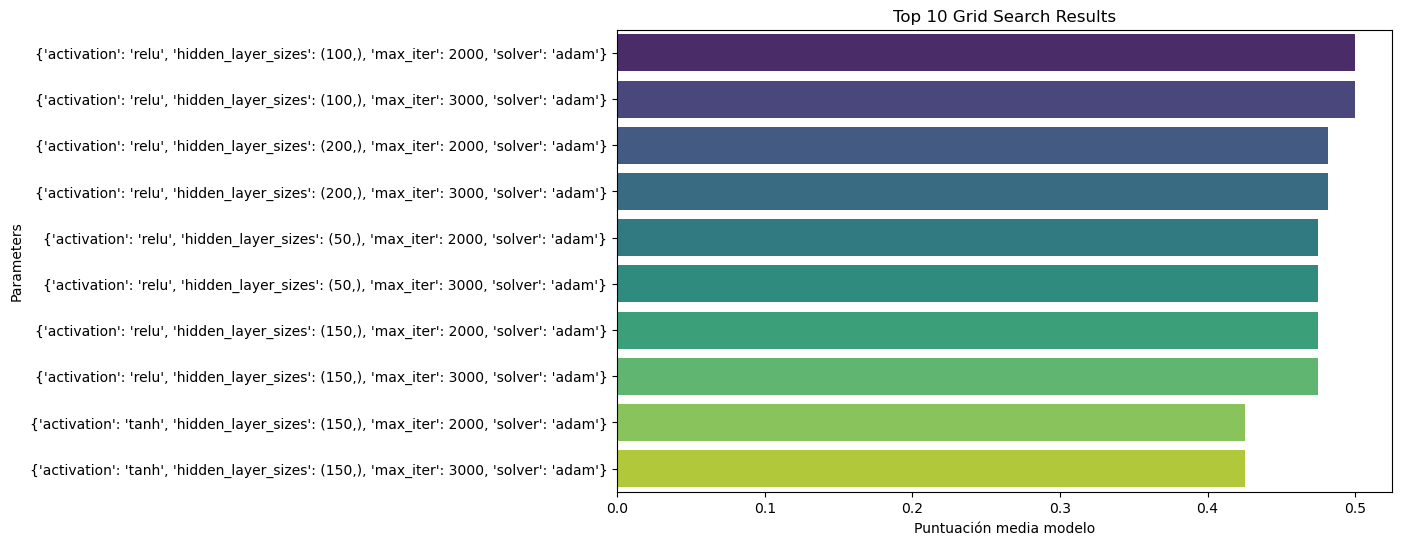

Mejores parámetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 2000, 'solver': 'adam'}
Puntuación media de validación cruzada del mejor modelo: 0.5
Precisión del modelo NN: 0.7071428571428572
Exhaustividad del modelo NN: 0.4489795918367347
F1-score del modelo NN: 0.5176470588235293
Matriz de confusión del modelo NN:
                 Predicho Negativo  Predicho Positivo
Actual Negativo                 77                 14
Actual Positivo                 27                 22
Especificidad del modelo NN: 0.8461538461538461
G-Mean del modelo NN: 0.6163649961485784
Índice de Matthews del modelo NN: 0.322084060766255
Área bajo la curva ROC del modelo NN: 0.7526351199820588


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(columns=['stroke'])  # Características
y = df['stroke']  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros a probar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Número de neuronas en cada capa oculta
    'activation': ['logistic', 'tanh', 'relu'],  # Función de activación
    'solver': ['sgd', 'adam'],  # Algoritmo de optimización
    #'alpha': [0.0001, 0.001, 0.01],  # Parámetro de regularización L2
    #'learning_rate': ['constant', 'adaptive'],  # Tasa de aprendizaje
    'max_iter': [2000, 3000],  # Número máximo de iteraciones
}

# Inicializar el clasificador MLP
nn = MLPClassifier(random_state=42)

# Inicializar la búsqueda en la cuadrícula con validación cruzada, usando recall como métrica de puntuación
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring='recall')

# Entrenar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Visualizar los resultados utilizando seaborn
results_df = pd.DataFrame(grid_search.cv_results_)
top_n = 10  # Definir el número de combinaciones de parámetros principales que deseas mostrar
top_results = results_df.nlargest(top_n, 'mean_test_score')
params_str = [str(params) for params in top_results['params']]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_results['mean_test_score'], y=params_str, orient='h', palette='viridis')
plt.xlabel('Puntuación media modelo')
plt.ylabel('Parameters')
plt.title('Top {} Grid Search Results'.format(top_n))
plt.show()

# Obtener el mejor modelo encontrado por la búsqueda en la cuadrícula
best_nn = grid_search.best_estimator_

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener la puntuación media de validación cruzada del mejor modelo
print("Puntuación media de validación cruzada del mejor modelo:", grid_search.best_score_)

# Predecir sobre el conjunto de prueba con el mejor modelo
y_pred = best_nn.predict(X_test)

# Calcular y mostrar métricas de evaluación
accuracy_nn = accuracy_score(y_test, y_pred)
print("Precisión del modelo NN:", accuracy_nn)

recall_nn = recall_score(y_test, y_pred)
print("Exhaustividad del modelo NN:", recall_nn)

f1_nn = f1_score(y_test, y_pred)
print("F1-score del modelo NN:", f1_nn)

conf_matrix = confusion_matrix(y_test, y_pred)
confusion_nn = pd.DataFrame(conf_matrix, index=['Actual Negativo', 'Actual Positivo'], columns=['Predicho Negativo', 'Predicho Positivo'])
print("Matriz de confusión del modelo NN:")
print(confusion_nn)

tn, fp, fn, tp = conf_matrix.ravel()
specificity_nn = tn / (tn + fp)
print("Especificidad del modelo NN:", specificity_nn)

g_mean_nn = (recall_nn * specificity_nn) ** 0.5
print("G-Mean del modelo NN:", g_mean_nn)

mcc_nn = matthews_corrcoef(y_test, y_pred)
print("Índice de Matthews del modelo NN:", mcc_nn)

y_proba_nn = best_nn.predict_proba(X_test)[:, 1]
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)
print("Área bajo la curva ROC del modelo NN:", roc_auc_nn)


# Comparativa de metricas visualmente

### Tabla comparando precision, exhaustividad  y f1 score

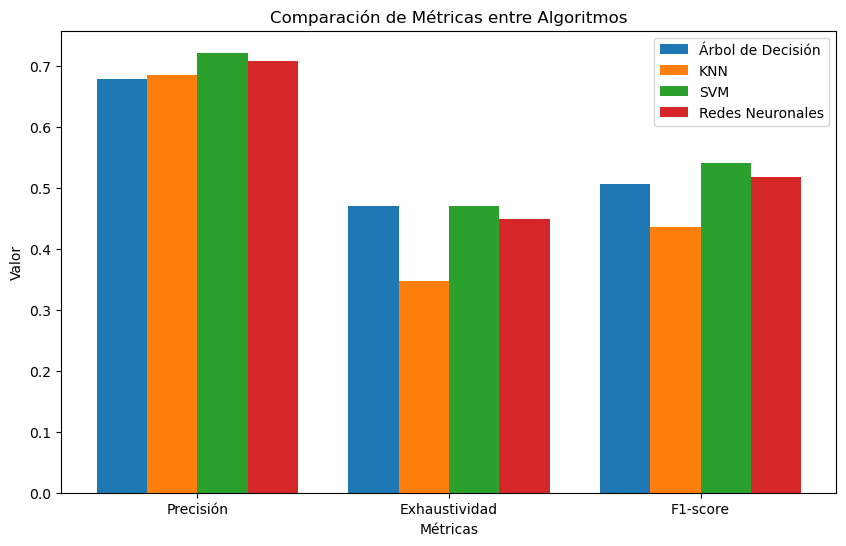

In [ ]:
import matplotlib.pyplot as plt

# Gráfico comparativo de Precisión, Exhaustividad y F1-score
labels = ['Precisión', 'Exhaustividad', 'F1-score']
dt_metrics = [accuracy_dt, recall_dt, f1_dt]
knn_metrics = [accuracy_knn, recall_knn, f1_knn]
svm_metrics = [accuracy_svm, recall_svm, f1_svm]
nn_metrics = [accuracy_nn, recall_nn, f1_nn]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, dt_metrics, width=0.2, label='Árbol de Decisión')
plt.bar([i + 0.2 for i in x], knn_metrics, width=0.2, label='KNN')
plt.bar([i + 0.4 for i in x], svm_metrics, width=0.2, label='SVM')
plt.bar([i + 0.6 for i in x], nn_metrics, width=0.2, label='Redes Neuronales')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Algoritmos')
plt.xticks([i + 0.3 for i in x], labels)
plt.legend()
plt.show()


### Matrices de confusion de los distintos modelos

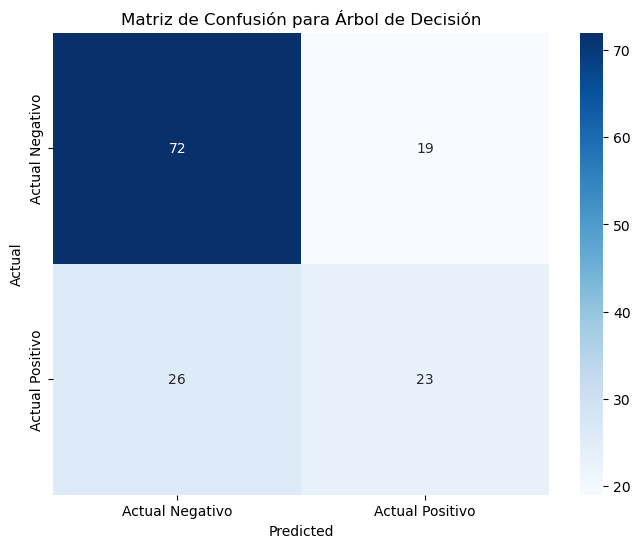

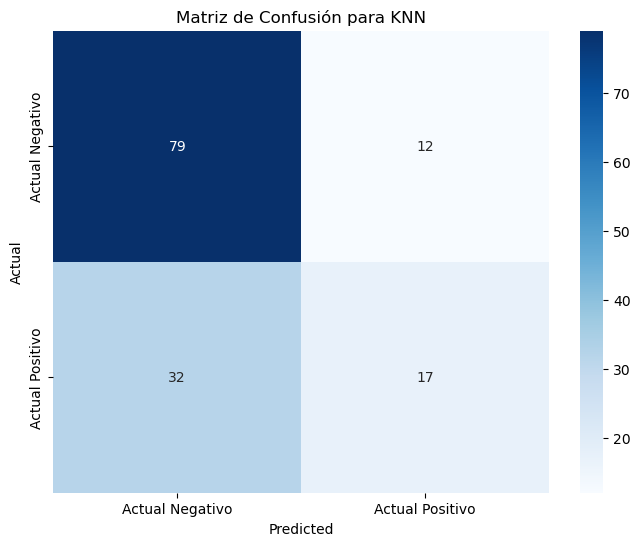

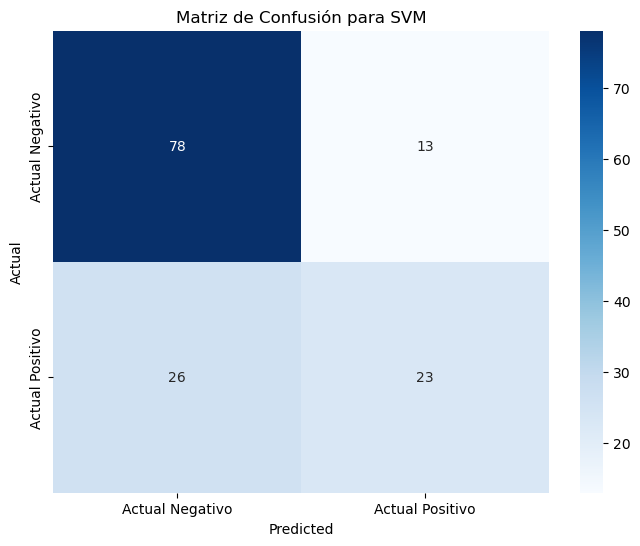

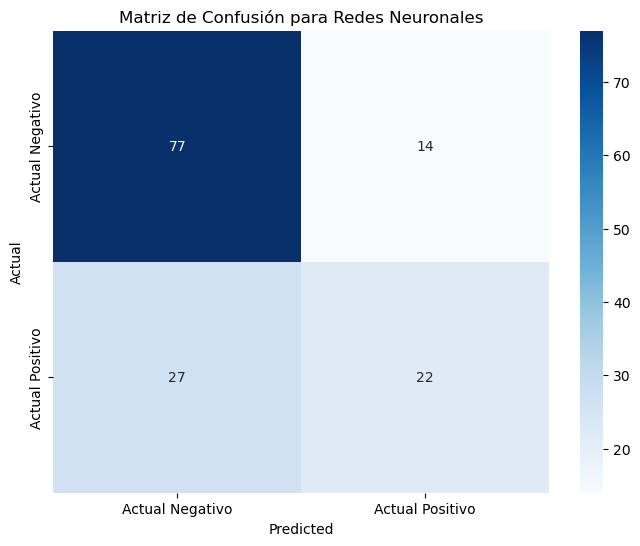

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define las etiquetas para los ejes
labels = ['Negativo', 'Positivo']

# Función para graficar la matriz de confusión
def plot_confusion_matrix(conf_matrix, algorithm_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Matriz de Confusión para {algorithm_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Llamadas a la función para cada algoritmo
plot_confusion_matrix(confusion_dt, 'Árbol de Decisión')
plot_confusion_matrix(confusion_knn, 'KNN')
plot_confusion_matrix(confusion_svm, 'SVM')
plot_confusion_matrix(confusion_nn, 'Redes Neuronales')


## Generacion de graficos

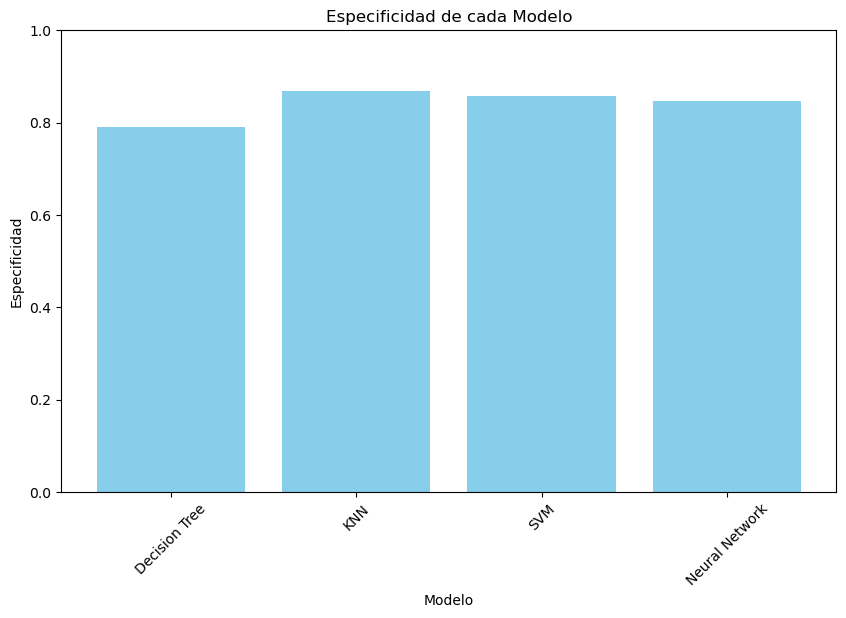

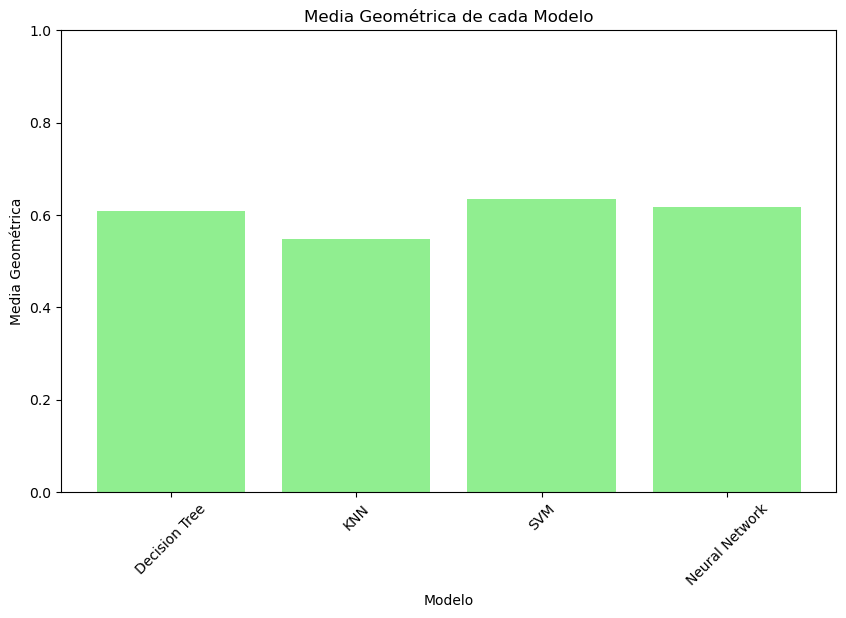

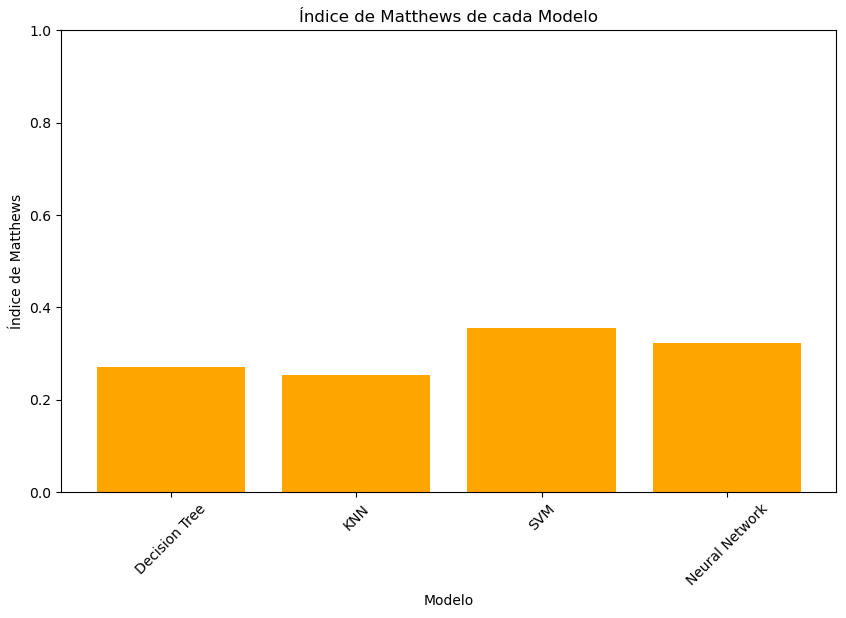

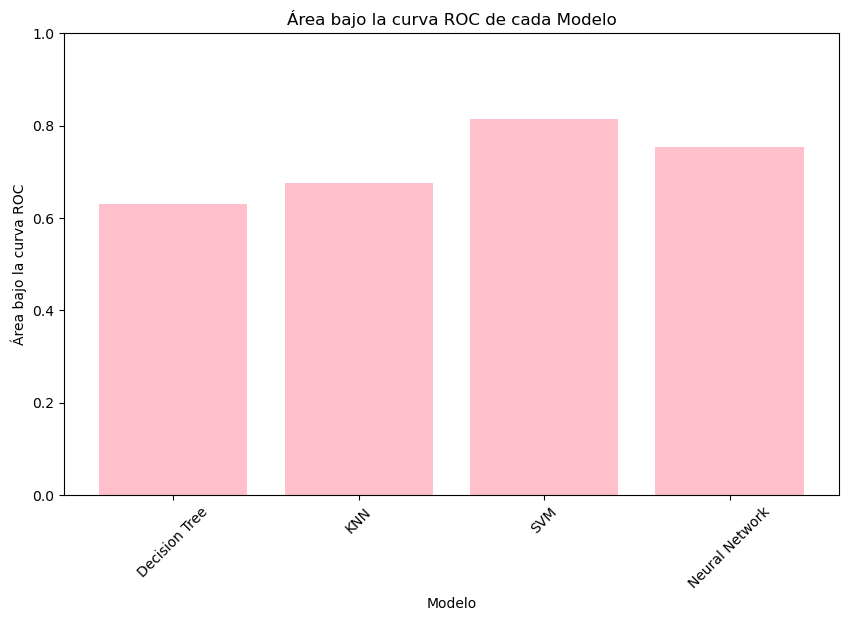

In [ ]:
import matplotlib.pyplot as plt

# Precisión
specificity_values = [accuracy_dt, accuracy_knn, accuracy_svm, accuracy_nn]
algorithms = ['Decision Tree', 'KNN', 'SVM', 'Neural Network']
plt.figure(figsize=(10, 6))
plt.bar(algorithms, specificity_values, color='crimson')
plt.title('Precisión de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Exhaustividad
specificity_values = [recall_dt, recall_knn, recall_svm, recall_nn]
algorithms = ['Decision Tree', 'KNN', 'SVM', 'Neural Network']
plt.figure(figsize=(10, 6))
plt.bar(algorithms, specificity_values, color='navy')
plt.title('Exhaustividad de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Exhaustividad')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# F1-Score
specificity_values = [f1_dt, f1_knn, f1_svm, f1_nn]
algorithms = ['Decision Tree', 'KNN', 'SVM', 'Neural Network']
plt.figure(figsize=(10, 6))
plt.bar(algorithms, specificity_values, color='blueviolet')
plt.title('F1-Score de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Especificidad
specificity_values = [specificity_dt, specificity_knn, specificity_svm, specificity_nn]
algorithms = ['Decision Tree', 'KNN', 'SVM', 'Neural Network']
plt.figure(figsize=(10, 6))
plt.bar(algorithms, specificity_values, color='skyblue')
plt.title('Especificidad de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Especificidad')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Media Geométrica
gmean_values = [g_mean_dt, g_mean_knn, g_mean_svm, g_mean_nn]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, gmean_values, color='lightgreen')
plt.title('Media Geométrica de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Media Geométrica')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Índice de Matthews
mcc_values = [mcc_dt, mcc_knn, mcc_svm, mcc_nn]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mcc_values, color='orange')
plt.title('Índice de Matthews de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Índice de Matthews')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Área bajo la curva ROC
roc_auc_values = [roc_auc_dt, roc_auc_knn, roc_auc_svm, roc_auc_nn]
plt.figure(figsize=(10, 6))
plt.bar(algorithms, roc_auc_values, color='pink')
plt.title('Área bajo la curva ROC de cada Modelo')
plt.xlabel('Modelo')
plt.ylabel('Área bajo la curva ROC')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


###Obtención del mejor método con un cálculo por pesos

In [ ]:
#Crear diccionario con los valores de cada método
resultados = {
    'decision_tree': {'accuracy': accuracy_dt, 'recall': recall_dt, 'f1-score': f1_dt, 'specificity': specificity_dt, 'g-mean': g_mean_dt, 'matthews': mcc_dt, 'roc': roc_auc_dt},
    'SVM': {'accuracy': accuracy_svm, 'recall': recall_svm, 'f1-score': f1_svm, 'specificity': specificity_svm, 'g-mean': g_mean_svm, 'matthews': mcc_svm, 'roc': roc_auc_svm},
    'KNN': {'accuracy': accuracy_knn, 'recall': recall_knn, 'f1-score': f1_knn, 'specificity': specificity_knn, 'g-mean': g_mean_knn, 'matthews': mcc_knn, 'roc': roc_auc_knn},
    'neuronal_network': {'accuracy': accuracy_nn, 'recall': recall_nn, 'f1-score': f1_nn, 'specificity': specificity_nn, 'g-mean': g_mean_nn, 'matthews': mcc_nn, 'roc': roc_auc_nn}
}
"""Pequeño resumen para dar pesos:
-Subir accuracy si las clases están equilibradas (es decir, si en el dataset existe igualdad de clases objetivo [No lo está: tenemos un 95% de strokes negativos y solo 5% de strokes positivos])
-Subir recall si nos importa minimizar los falsos negativos
-Subir f1-score si nos importan los falsos-negativos y los falsos-positivos por igual
-Subir specificity si nos importan los falsos positivos
-Subir G-Mean si las clases están desequilibradas
-Subir Matthews si nos importa los verdaderos falsos positivos y negativos
-Subir ROC si nos importa la tasa de verdaderos positivos y la tasa de falsos positivos (Parametro robusto incluso con desequilibrio de clases)
"""
#Crear diccionario para darle peso a cada parámetro
pesos = {'accuracy': 0.1, 'recall': 0.15, 'f1-score': 0.1, 'specificity': 0.05, 'g-mean': 0.15, 'matthews': 0.15, 'roc': 0.3}

#Calcular una puntuación para cada método que dependa de los pesos dados anteriormente
puntuaciones = {}
for metodo, valores in resultados.items():
  puntuacion = sum(valores[parametro] * pesos[parametro] for parametro in valores)
  puntuaciones[metodo] = puntuacion

#Obtenemos el método con mayor puntuación
metodo_max_puntuacion = max(puntuaciones, key=puntuaciones.get)

metodo_max_puntuacion

'SVM'

### Sistema de votos y uso de los modelos

In [ ]:
import pandas as pd
from sklearn.preprocessing import normalize

# Codificaciones consistentes
gender_codes = {'male': 0, 'female': 1}
ever_married_codes = {'no': 0, 'yes': 1}
work_type_codes = {'private': 0, 'self-employed': 1, 'govt_job': 2}
residence_type_codes = {'urban': 0, 'rural': 1}
smoking_status_codes = {'smoked': 0, 'never smoked': 1, 'smokes': 2}

# Obtener datos del cliente
gender = input("Género (Male/Female): ").lower()
age = float(input("Edad: "))
hypertension = int(input("Hipertensión (0 si no, 1 si sí): "))
heart_disease = int(input("Enfermedad cardiaca (0 si no, 1 si sí): "))
ever_married = input("¿Está casado/a? (Yes/No): ").lower()
work_type = input("Tipo de trabajo (Private/Self-employed/Govt_job): ").lower()
Residence_type = input("Tipo de residencia (Urban/Rural): ").lower()
avg_glucose_level = float(input("Nivel medio de glucosa: "))
bmi = float(input("Índice de masa corporal (BMI): "))
smoking_status = input("Estado de fumador (smoked/never smoked/smokes): ").lower()

# Crear DataFrame con los datos del cliente
data = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [Residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
}

df_client = pd.DataFrame(data)

# Aplicar las codificaciones consistentes
df_client['gender'] = df_client['gender'].map(gender_codes)
df_client['ever_married'] = df_client['ever_married'].map(ever_married_codes)
df_client['work_type'] = df_client['work_type'].map(work_type_codes)
df_client['Residence_type'] = df_client['Residence_type'].map(residence_type_codes)
df_client['smoking_status'] = df_client['smoking_status'].map(smoking_status_codes)

# Normalizar los datos de entrada del cliente
columnas_numericas = ['age', 'avg_glucose_level', 'bmi']
df_client[columnas_numericas] = normalize(df_client[columnas_numericas])

print(df_client)


Género (Male/Female): male
Edad: 28
Hipertensión (0 si no, 1 si sí): 0
Enfermedad cardiaca (0 si no, 1 si sí): 0
¿Está casado/a? (Yes/No): no
Tipo de trabajo (Private/Self-employed/Govt_job): private
Tipo de residencia (Urban/Rural): urban
Nivel medio de glucosa: 200
Índice de masa corporal (BMI): 28
Estado de fumador (smoked/never smoked/smokes): never smoked
   gender       age  hypertension  heart_disease  ever_married  work_type  \
0       0  0.137334             0              0             0          0   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0               0           0.980958  0.137334               1  


In [ ]:
# Hacer la predicción con cada modelo
y_pred_tree = best_clf.predict(df_client)
y_pred_svm = best_svm.predict(df_client)
y_pred_knn = best_knn.predict(df_client)
y_pred_nn = best_nn.predict(df_client)

votos_propensos = sum([y_pred_tree, y_pred_svm, y_pred_knn, y_pred_nn])

# Interpretar la predicción final
if votos_propensos > 2:
    resultado = 1
    votos = "sistema de votos con resultado por mayoria"
elif votos_propensos < 2:
    resultado = 0
    votos = "sistema de votos con resultado por mayoria"
else:
    votos = "empate de votación. Se decide resultado con el mejor método"
    match metodo_max_puntuacion:
      case "decision_tree":
        resultado = y_pred_tree
      case "SVM":
        resultado = y_pred_svm
      case "KNN":
        resultado = y_pred_knn
      case "neuronal_network":
        resultado = y_pred_nn

if resultado == 1:
  texto = "es candidato a sufrir ictus"
else:
  texto = "no es candidato a sufrir ictus"

print(f"El paciente {texto} basado en {votos}.")



El paciente no es candidato a sufrir ictus basado en sistema de votos con resultado por mayoria.


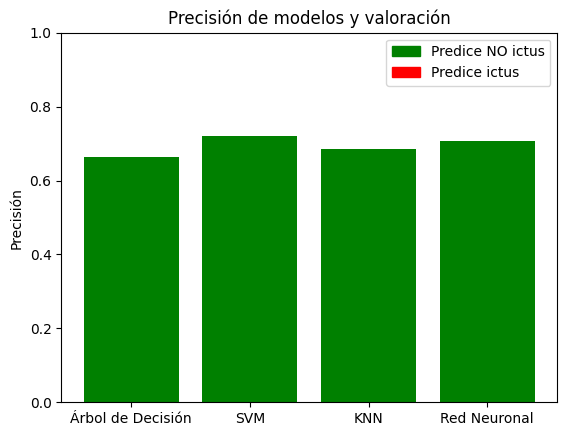

In [ ]:
#Crear figura y ejes
fig, ax = plt.subplots()

#Crear variables para poner color verde a una prediccion negativa y roja a una prediccion positiva
tree_color = 'green' if y_pred_tree == 0 else 'red'
svm_color = 'green' if y_pred_svm == 0 else 'red'
knn_color = 'green' if y_pred_knn == 0 else 'red'
nn_color = 'green' if y_pred_nn == 0 else 'red'

#Crear barras
ax.bar(0, accuracy_dt, color=tree_color)
ax.bar(1, accuracy_svm, color=svm_color)
ax.bar(2, accuracy_knn, color=knn_color)
ax.bar(3, accuracy_nn, color=nn_color)

#Configurar ejes
ax.set_xticks(range(len([accuracy_dt, accuracy_svm, accuracy_knn, accuracy_nn])))
ax.set_xticklabels(['Árbol de Decisión', 'SVM', 'KNN', 'Red Neuronal'])
ax.set_ylim(0, 1)
ax.set_ylabel('Precisión')
ax.set_title('Precisión de modelos y valoración')

# Crear la leyenda
legend_labels = ['Predice NO ictus', 'Predice ictus']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='green'), plt.Rectangle((0, 0), 1, 1, color='red')]
ax.legend(legend_handles, legend_labels, loc='upper right')

plt.show()